In [1]:
import re
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from fetch_process_function import fetch_and_save_erc20_transfers, process_transactions, calculate_pnl, process_and_save_address

# ADDRESS = "0x5be9a4959308A0D0c7bC0870E319314d8D957dBB"
ADDRESS2 = "0x2c89a2ee92b9870f55989b4132a58c0e85222d86"
ADDRESS3 = "0x6c2a355929ee1262305e385ad49b84fe5f5a4777"

# OUTPUT_FILE = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/result"
# OUTPUT_FILE2 = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2"
# OUTPUT_FILE3 = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3"

OUTPUT_FILE2 = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2"
OUTPUT_FILE3 = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3"

API_KEY = "VQAIR728IM4Z8RZKPYBR4ESM5I3WBZK2C1"
BASE_TOKENS = {"USDT", "USDC", "USDE", "DAI"}
base_pattern = re.compile('|'.join(BASE_TOKENS))

In [2]:
START_DATE = datetime(2024, 4, 25, 8, 0)  # 开始时间
END_DATE = datetime(2025, 1, 17, 8, 0)    # 结束时间
BATCH_DAYS = 60  # 每个批次的天数

def fetch_data_in_batches(address, output_file, start_date, end_date, batch_days):
    """
    分批次获取数据并保存。
    :param address: 钱包地址。
    :param output_file: 输出文件路径。
    :param start_date: 开始时间。
    :param end_date: 结束时间。
    :param batch_days: 每个批次的天数。
    :return: 合并后的 DataFrame。
    """
    current_start = start_date
    all_transfers = []

    while current_start < end_date:
        current_end = min(current_start + timedelta(days=batch_days), end_date)

        # 获取当前批次的数据
        print(f"Fetching data for {address} from {current_start} to {current_end}...")
        fetch_and_save_erc20_transfers(
            address=address,
            start_date=current_start.strftime('%Y-%m-%d %H:%M'),
            end_date=current_end.strftime('%Y-%m-%d %H:%M'),
            output_file=output_file,
            offset=1000,
        )

        transfers_df = pd.read_csv(output_file + "/erc20_transfers.csv")
        all_transfers.append(transfers_df)

        current_start = current_end

    # 合并所有批次的数据
    combined_transfers = pd.concat(all_transfers, ignore_index=True)
    return combined_transfers

# 分批次获取 ADDRESS2 的数据
transfers_df2 = fetch_data_in_batches(ADDRESS2, OUTPUT_FILE2, START_DATE, END_DATE, BATCH_DAYS)
record_df_1_2, _, _ = process_transactions(transfers_df2, OUTPUT_FILE2, ADDRESS2, base_pattern)

# 分批次获取 ADDRESS3 的数据
transfers_df3 = fetch_data_in_batches(ADDRESS3, OUTPUT_FILE3, START_DATE, END_DATE, BATCH_DAYS)
record_df_1_3, _, _ = process_transactions(transfers_df3, OUTPUT_FILE3, ADDRESS3, base_pattern)

# 合并两个地址的数据
combined_record_df = pd.concat([record_df_1_2, record_df_1_3], ignore_index=True)

Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-04-25 08:00:00 to 2024-06-24 08:00:00...


2025-02-06 21:31:05,050 - INFO - Start block: 19728664, End block: 20157826
2025-02-06 21:31:05,050 - INFO - Fetching ERC20 transfers from block 19728664 to 20157826...
2025-02-06 21:31:06,046 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-06 21:31:06,046 - INFO - Final dataset contains 0 unique transactions.
2025-02-06 21:31:06,046 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-06 21:31:06,057 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-06-24 08:00:00 to 2024-08-23 08:00:00...


2025-02-06 21:31:08,104 - INFO - Start block: 20157825, End block: 20587589
2025-02-06 21:31:08,104 - INFO - Fetching ERC20 transfers from block 20157825 to 20587589...
2025-02-06 21:31:09,233 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-06 21:31:09,236 - INFO - Final dataset contains 0 unique transactions.
2025-02-06 21:31:09,237 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-06 21:31:09,237 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-08-23 08:00:00 to 2024-10-22 08:00:00...


2025-02-06 21:31:11,274 - INFO - Start block: 20587588, End block: 21017402
2025-02-06 21:31:11,274 - INFO - Fetching ERC20 transfers from block 20587588 to 21017402...
2025-02-06 21:31:12,288 - INFO - Page 1: Retrieved 61 transactions.
2025-02-06 21:31:13,276 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-06 21:31:13,300 - INFO - Final dataset contains 61 unique transactions.
2025-02-06 21:31:13,387 - INFO - Data successfully saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-06 21:31:13,392 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-10-22 08:00:00 to 2024-12-21 08:00:00...


2025-02-06 21:31:15,472 - INFO - Start block: 21017401, End block: 21447176
2025-02-06 21:31:15,476 - INFO - Fetching ERC20 transfers from block 21017401 to 21447176...
2025-02-06 21:31:18,232 - INFO - Page 1: Retrieved 975 transactions.
2025-02-06 21:31:19,208 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-06 21:31:19,224 - INFO - Final dataset contains 975 unique transactions.
2025-02-06 21:31:19,400 - INFO - Data successfully saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-06 21:31:19,403 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-12-21 08:00:00 to 2025-01-17 08:00:00...


2025-02-06 21:31:21,421 - INFO - Start block: 21447175, End block: 21640492
2025-02-06 21:31:21,423 - INFO - Fetching ERC20 transfers from block 21447175 to 21640492...
2025-02-06 21:31:23,740 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-06 21:31:24,818 - INFO - Page 2: Retrieved 127 transactions.
2025-02-06 21:31:25,789 - WARNING - API request failed on page 3: Request failed: No transactions found
2025-02-06 21:31:25,812 - INFO - Final dataset contains 1127 unique transactions.
2025-02-06 21:31:25,917 - INFO - Data successfully saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-06 21:31:25,933 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-04-25 08:00:00 to 2024-06-24 08:00:00...


2025-02-06 21:31:33,522 - INFO - Start block: 19728664, End block: 20157826
2025-02-06 21:31:33,522 - INFO - Fetching ERC20 transfers from block 19728664 to 20157826...
2025-02-06 21:31:34,557 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-06 21:31:34,575 - INFO - Final dataset contains 0 unique transactions.
2025-02-06 21:31:34,580 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-06 21:31:34,584 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-06-24 08:00:00 to 2024-08-23 08:00:00...


2025-02-06 21:31:36,801 - INFO - Start block: 20157825, End block: 20587589
2025-02-06 21:31:36,805 - INFO - Fetching ERC20 transfers from block 20157825 to 20587589...
2025-02-06 21:31:37,793 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-06 21:31:37,802 - INFO - Final dataset contains 0 unique transactions.
2025-02-06 21:31:37,806 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-06 21:31:37,809 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-08-23 08:00:00 to 2024-10-22 08:00:00...


2025-02-06 21:31:39,995 - INFO - Start block: 20587588, End block: 21017402
2025-02-06 21:31:39,995 - INFO - Fetching ERC20 transfers from block 20587588 to 21017402...
2025-02-06 21:31:40,993 - INFO - Page 1: Retrieved 75 transactions.
2025-02-06 21:31:41,988 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-06 21:31:41,998 - INFO - Final dataset contains 75 unique transactions.
2025-02-06 21:31:42,070 - INFO - Data successfully saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3\erc20_transfers.csv
2025-02-06 21:31:42,075 - INFO - Transfers saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-10-22 08:00:00 to 2024-12-21 08:00:00...


2025-02-06 21:31:44,159 - INFO - Start block: 21017401, End block: 21447176
2025-02-06 21:31:44,166 - INFO - Fetching ERC20 transfers from block 21017401 to 21447176...
2025-02-06 21:31:45,903 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-06 21:31:47,491 - INFO - Page 2: Retrieved 1000 transactions.
2025-02-06 21:31:49,079 - INFO - Page 3: Retrieved 1000 transactions.
2025-02-06 21:31:50,673 - INFO - Page 4: Retrieved 1000 transactions.
2025-02-06 21:31:52,310 - INFO - Page 5: Retrieved 1000 transactions.
2025-02-06 21:31:53,598 - INFO - Page 6: Retrieved 187 transactions.
2025-02-06 21:31:54,591 - WARNING - API request failed on page 7: Request failed: No transactions found
2025-02-06 21:31:54,668 - INFO - Final dataset contains 5187 unique transactions.
2025-02-06 21:31:55,104 - INFO - Data successfully saved to C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3\erc20_transfers.csv
2025-02-06 21:31:55,106 - INFO - Transfers saved to C:/Users/HUAWEI/Docume

Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-12-21 08:00:00 to 2025-01-17 08:00:00...


2025-02-06 21:31:57,137 - INFO - Start block: 21447175, End block: 21640492
2025-02-06 21:31:57,149 - INFO - Fetching ERC20 transfers from block 21447175 to 21640492...
2025-02-06 21:31:58,757 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-06 21:32:00,290 - INFO - Page 2: Retrieved 1000 transactions.
2025-02-06 21:32:02,110 - INFO - Page 3: Retrieved 1000 transactions.
2025-02-06 21:32:03,803 - INFO - Page 4: Retrieved 1000 transactions.
2025-02-06 21:32:05,349 - INFO - Page 5: Retrieved 1000 transactions.
2025-02-06 21:32:07,003 - INFO - Page 6: Retrieved 1000 transactions.
2025-02-06 21:32:08,646 - INFO - Page 7: Retrieved 1000 transactions.
2025-02-06 21:32:10,354 - INFO - Page 8: Retrieved 1000 transactions.
2025-02-06 21:32:12,227 - INFO - Page 9: Retrieved 681 transactions.
2025-02-06 21:32:13,250 - WARNING - API request failed on page 10: Request failed: No transactions found
2025-02-06 21:32:13,329 - INFO - Final dataset contains 8681 unique transactions.
2025-02-06 21:3

In [3]:
import os

def process_pnl(record_df):
    if not record_df.empty:
        unique_tokens_count = record_df["token_symbol"].nunique()
        unique_tokens = record_df["token_symbol"].unique()
        results = []
        pnl_dfs = []  # 用于存储每个token的pnl_df
        # 在USDC USDE USDT DAI的价格默认为1：1的情况下，不考虑不同的稳定币作为单位的情况

        for token in unique_tokens:
            token_df = record_df[record_df["formatted_record"].str.contains(fr"\b{token}\b", regex=True)]
            unique_price_units = token_df["price_unit"].unique()
            price_units_str = ", ".join(unique_price_units)
            
            print(f"{token} (Price Units: {price_units_str}): {len(token_df)} records")

            pnl_df = calculate_pnl(token_df)
            print(tabulate(pnl_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))   
            total_pnl = pnl_df["pnl"].sum()

            pnl_dfs.append(pnl_df)  # 将每个token的pnl_df存储到pnl_dfs
            results.append({"token": token, "price_unit": price_units_str, "total_pnl": total_pnl})

        pnl_summary_df = pd.DataFrame(results)
        print(tabulate(pnl_summary_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))
        
        # 结果保存
        # save_dir = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/pnl_result"
        save_dir = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/pnl_result"
        file_name = f"pnl_summary.csv"
        full_path = os.path.join(save_dir, file_name)
        pnl_summary_df.to_csv(full_path, index=False)
        print("PNL summary saved to pnl_summary.csv")

        for token in unique_tokens:
            token_df = record_df[record_df["formatted_record"].str.contains(fr"\b{token}\b", regex=True)]
            pnl_df = calculate_pnl(token_df)
            file_name = f"pnl_details_{token}.csv"
            full_path = os.path.join(save_dir, file_name)
            pnl_df.to_csv(full_path, index=False)
            print(f"PNL details for {token} saved to pnl_details_{token}.csv")
    else:
        print("No transactions found")
    
def process_eth_pnl(record_df):
    # 把eth的记录合并观察
    if not record_df.empty:
        eth_record_df = record_df[record_df["token_symbol"].str.contains(r'ETH', regex=True, case=False)]
        
        if eth_record_df.empty:
            print("No ETH-related transactions found.")
            return pd.DataFrame()
        eth_pnl_df = calculate_pnl(eth_record_df).sort_values("timeStamp")
        print(tabulate(eth_pnl_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))
        eth_pnl_df.to_csv("C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        # eth_pnl_df.to_csv("C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        return eth_pnl_df
    
    else:
        print("No transactions found")
        return pd.DataFrame()

combined_record_df = combined_record_df.sort_values("timeStamp")
eth_record_df = process_eth_pnl(combined_record_df)
process_pnl(combined_record_df)

+---------------------+-------------+--------+----------+---------+------------+----------------+
| Date                |   timeStamp | Type   |   amount |   price |        pnl |   net_position |
+=====================+=============+========+==========+=========+============+================+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   226.00 | 2654.89 |  141272.98 |         226.00 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   629.40 | 2654.89 |  393445.24 |         855.40 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |    74.58 | 2654.89 |   46620.08 |         929.98 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:23 |  1727622443 | BUY    |   200.00 | 2654.99 |  125001.65 |        1129.98 |
+-------------------

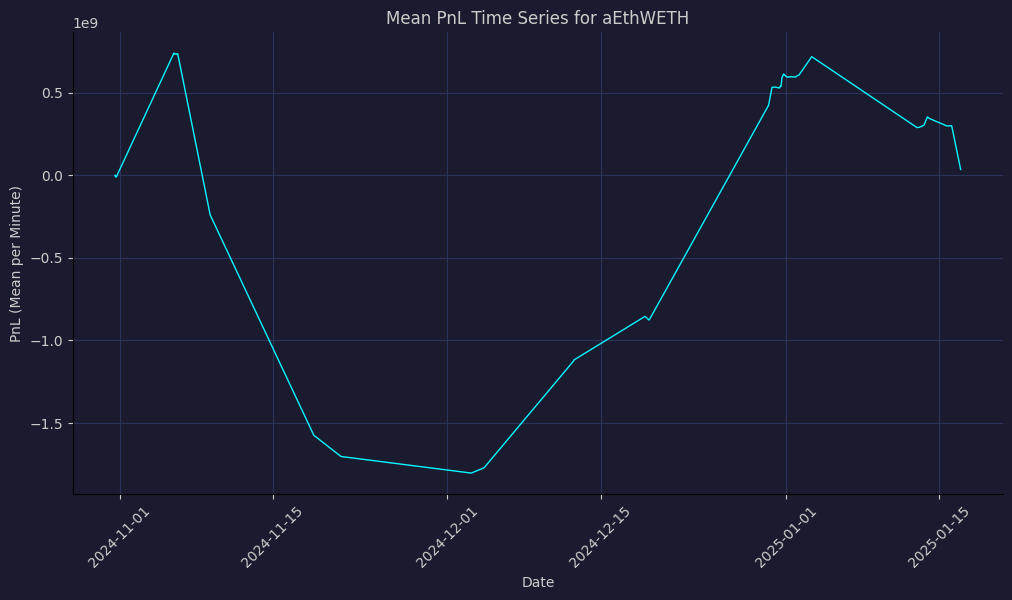

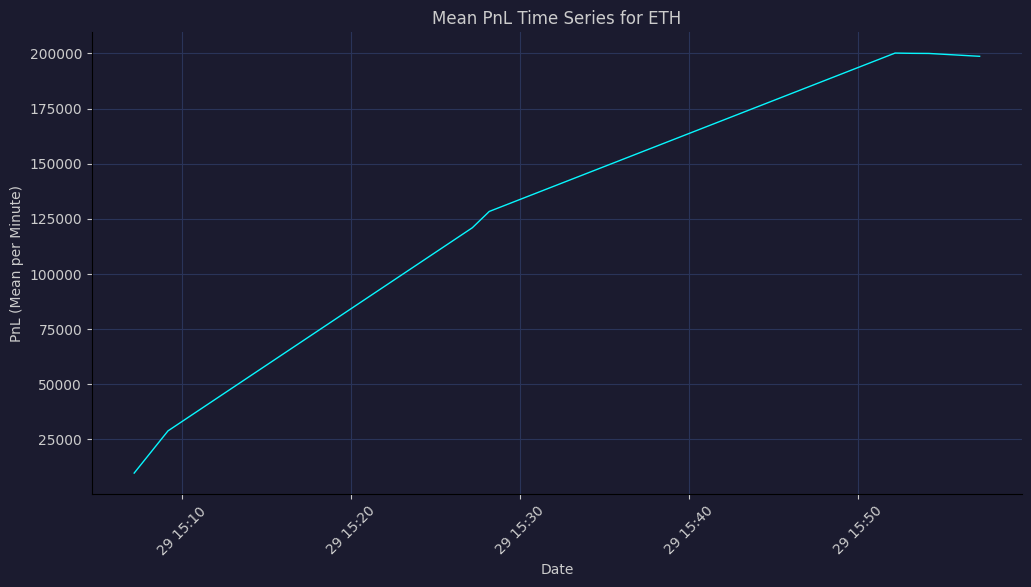

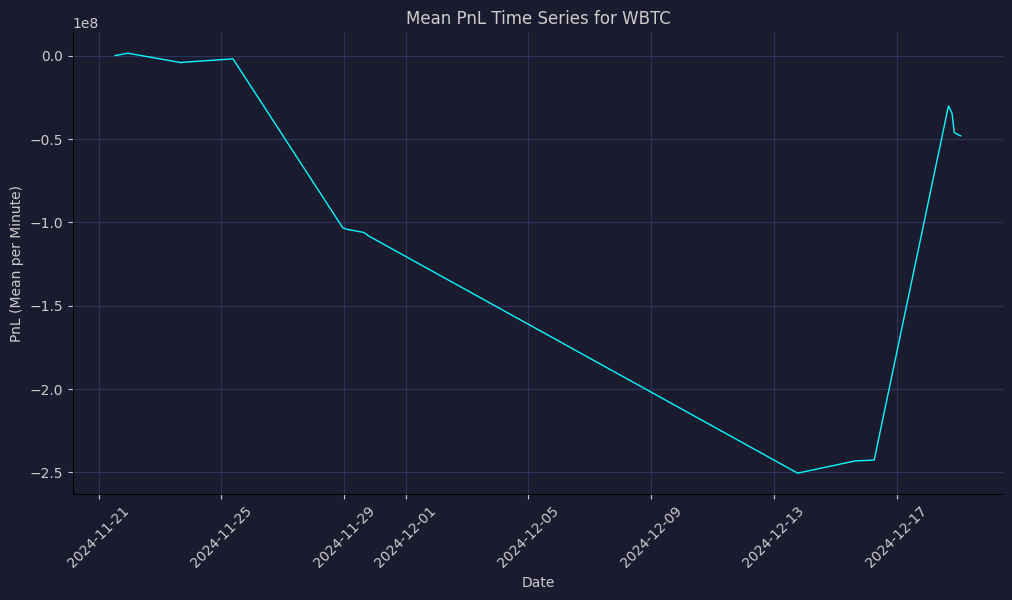

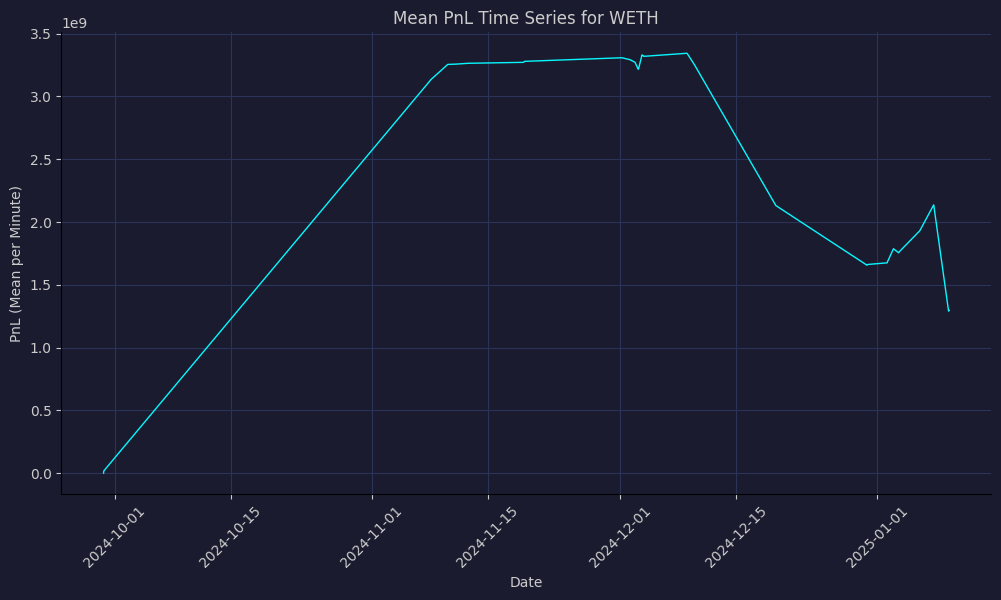

In [5]:
# folder_path = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/pnl_result"
folder_path = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/pnl_result"

all_files = [f for f in os.listdir(folder_path) if f.startswith("pnl_details_") and f.endswith(".csv")]

dfs = {}

for filename in all_files:
    token = filename.replace("pnl_details_", "").replace(".csv", "")
    
    # aEthWETH_pnl / ETH_pnl / WETH_pnl ...
    dict_key = f"{token}_pnl"

    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    dfs[dict_key] = df
                

for name, df in dfs.items():
    if 'Date' in df.columns and 'pnl' in df.columns:
        token_for_label = name.replace('_pnl', '') # name = aEthWETH_pnl, then tokenn is aEthWETH

        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        # df_grouped = df.groupby('Date').agg({'pnl': 'sum'}).reset_index()
        df_grouped = df.groupby(df['Date'].dt.floor('s')).agg({'pnl': 'sum'}).reset_index() # 按秒相加

        full_time_index = pd.date_range(start=df_grouped['Date'].min(),
                                        end=df_grouped['Date'].max(),
                                        freq='min')

        df_grouped = df_grouped.set_index('Date').reindex(full_time_index).ffill().bfill().reset_index()
        df_grouped.rename(columns={'index': 'Date'}, inplace=True)

        # 计算累计 PnL
        df_grouped['cumulative_pnl'] = df_grouped['pnl'].cumsum()

        for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
            plt.rcParams[param] = '0.8'  # light grey

        for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
            plt.rcParams[param] = '#1B1B2F'  # deeper dark grey

        colors = [
            '#08F7FE',  # teal/cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green
        ]

        fig, ax = plt.subplots(figsize=(12, 6))

        ax.plot(df_grouped['Date'], df_grouped['cumulative_pnl'], color=colors[0], linewidth=1)
        # ax.fill_between(df_grouped['Date'], df_grouped['pnl'], color=colors[0], alpha=0.1)
        ax.set_xlabel("Date")
        ax.set_ylabel("PnL (Mean per Minute)")
        ax.set_title(f"Mean PnL Time Series for {token_for_label}")

        ax.grid(color='#2A3459')
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        plt.show()

In [6]:
def assign_band(date):
    """
    Assign a band identifier based on the date.
    """
    bands = [
        (pd.to_datetime('2024-04-25'), pd.to_datetime('2024-05-21'), "1 Band"),
        (pd.to_datetime('2024-08-12'), pd.to_datetime('2024-09-02'), "2 Band"),
        (pd.to_datetime('2024-09-04'), pd.to_datetime('2024-09-04'), "3 Band"),
        (pd.to_datetime('2024-09-06'), pd.to_datetime('2024-09-06'), "4 Band"),
        (pd.to_datetime('2024-09-06'), pd.to_datetime('2024-09-06'), "5 Band"),
        (pd.to_datetime('2024-09-06'), pd.to_datetime('2024-09-07'), "6 Band"),
        (pd.to_datetime('2024-09-16'), pd.to_datetime('2024-09-16'), "7 Band"),
        (pd.to_datetime('2024-09-17'), pd.to_datetime('2024-09-17'), "8 Band"),
        (pd.to_datetime('2024-09-18'), pd.to_datetime('2024-09-19'), "9 Band"),
        (pd.to_datetime('2024-09-26'), pd.to_datetime('2024-09-26'), "10 Band"),
        (pd.to_datetime('2024-09-28'), pd.to_datetime('2024-09-28'), "11 Band"),
        (pd.to_datetime('2024-09-29'), pd.to_datetime('2024-10-24'), "12 Band"),
        (pd.to_datetime('2024-10-25'), pd.to_datetime('2024-10-28'), "13 Band"),
        (pd.to_datetime('2024-11-01'), pd.to_datetime('2024-11-06'), "14 Band"),
        (pd.to_datetime('2024-11-08'), pd.to_datetime('2024-11-09'), "15 Band"),
        (pd.to_datetime('2024-11-11'), pd.to_datetime('2024-11-11'), "16 Band"),
        (pd.to_datetime('2024-11-12'), pd.to_datetime('2024-11-19'), "17 Band"),
        (pd.to_datetime('2024-11-19'), pd.to_datetime('2024-11-21'), "18 Band"),
        (pd.to_datetime('2024-12-02'), pd.to_datetime('2024-12-04'), "19 Band"),
        (pd.to_datetime('2024-12-09'), pd.to_datetime('2024-12-12'), "20 Band"),
        (pd.to_datetime('2024-12-20'), pd.to_datetime('2024-12-30'), "21 Band"),
        (pd.to_datetime('2024-12-31'), pd.to_datetime('2024-12-31'), "22 Band"),
        (pd.to_datetime('2025-01-01'), pd.to_datetime('2025-01-02'), "23 Band"),
        (pd.to_datetime('2025-01-02'), pd.to_datetime('2025-01-09'), "24 Band"),
        (pd.to_datetime('2025-01-09'), pd.to_datetime('2025-01-17'), "25 Band"),
    ]

    date = pd.to_datetime(date)

    for start, end, band in bands:
        if start <= date <= end:
            return band

    return "Unassigned Band"
    
# 计算pnl
def process_eth_pnl(record_df):
    if not record_df.empty:
        eth_record_df = record_df[record_df["token_symbol"].str.contains(r'ETH', regex=True, case=False)]
        
        if eth_record_df.empty:
            print("No ETH-related transactions found.")
            return pd.DataFrame()
        eth_pnl_df = calculate_pnl(eth_record_df).sort_values("timeStamp")
        print(tabulate(eth_pnl_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))
        eth_pnl_df.to_csv("C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        # eth_pnl_df.to_csv("C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        return eth_pnl_df
    
    else:
        print("No transactions found")
        return pd.DataFrame()

combined_record_df = combined_record_df.sort_values("timeStamp")
eth_record_df = process_eth_pnl(combined_record_df)

+---------------------+-------------+--------+----------+---------+------------+----------------+
| Date                |   timeStamp | Type   |   amount |   price |        pnl |   net_position |
+=====================+=============+========+==========+=========+============+================+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   226.00 | 2654.89 |  141272.98 |         226.00 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   629.40 | 2654.89 |  393445.24 |         855.40 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |    74.58 | 2654.89 |   46620.08 |         929.98 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:23 |  1727622443 | BUY    |   200.00 | 2654.99 |  125001.65 |        1129.98 |
+-------------------

In [7]:
def reproduce_band_table(record_df):
    if record_df.empty:
        print("No transactions found.")
        return
    # Add band identifier
    record_df['Band'] = record_df['Date'].apply(assign_band)

    # Group by band and calculate summary metrics
    band_summary = record_df.groupby('Band').agg(
        Time_Range=('Date', lambda x: f"{x.min().strftime('%Y-%m-%d')} - {x.max().strftime('%Y-%m-%d')}"),  # Time range        
        ETH_Amount=('amount', 'sum'),  # Sum of ETH amounts
        Band_Value=('amount', lambda x: (x * record_df.loc[x.index, 'price']).sum() / 1e4),  # Convert to million USD
        Open_Price=('price', 'first'),  # First price in the band
        Close_Price=('price', 'last'),  # Last price in the band
        PnL=('pnl', lambda x: x.sum() / 1e4)  # Sum of PnL in the band
    ).reset_index()

    band_summary = band_summary.rename(columns={
            "ETH_Amount": "ETH_Amount (ETH)",
            "Band_Value": "Band_Value (10K USD)",
            "Open_Price": "Open_Price (USD)",
            "Close_Price": "Close_Price (USD)",
            "PnL": "PnL (10K USD)"
        })

    band_summary = band_summary.sort_values(by='Band', ascending=True)
    # Print band summary
    print("Band-wise PnL Summary:")
    print(tabulate(band_summary, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))

    # Save band summary to CSV
    band_summary.to_csv("C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/band_pnl_summary.csv", index=False)
    # band_summary.to_csv("C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/band_pnl_summary.csv", index=False)
    print("Band-wise PnL summary saved to band_pnl_summary.csv")

reproduce_band_table(eth_record_df)

Band-wise PnL Summary:
+-----------------+-------------------------+--------------------+------------------------+--------------------+---------------------+-----------------+
| Band            | Time_Range              |   ETH_Amount (ETH) |   Band_Value (10K USD) |   Open_Price (USD) |   Close_Price (USD) |   PnL (10K USD) |
+=================+=========================+====================+========================+====================+=====================+=================+
| 12 Band         | 2024-09-29 - 2024-09-29 |            6229.53 |                1657.16 |            2654.89 |             2671.24 |          386.13 |
+-----------------+-------------------------+--------------------+------------------------+--------------------+---------------------+-----------------+
| 14 Band         | 2024-11-05 - 2024-11-05 |            1125.42 |                 273.47 |            2430.69 |             2425.97 |          -95.67 |
+-----------------+-------------------------+--------------

In [ ]:
import numpy as np

def calculate_sharpe_ratio_for_band(record_df, band, risk_free_rate=0.0):
    band_data = record_df[record_df['Band'] == band].copy()  # Ensure copy to avoid warnings
    
    # Calculate return rate = pnl / (amount * price)
    band_data['return_rate'] = band_data['pnl'] / (band_data['amount'] * band_data['price'])
    
    # Debugging: Print the return rates
    print(f"Band: {band}")
    print(f"Return Rates for Band {band}:")
    print(band_data['return_rate'])
    
    # Calculate mean and std of return rates
    mean_return = band_data['return_rate'].mean()
    std_return = band_data['return_rate'].std()

    # Debugging: Print mean and std
    print(f"Mean Return for Band {band}: {mean_return}")
    print(f"Standard Deviation for Band {band}: {std_return}")

    if std_return != 0:
        sharpe_ratio = (mean_return - risk_free_rate) / std_return
    else:
        sharpe_ratio = None  # If std is zero, return None
    
    return sharpe_ratio

# 假设计算Sortino比率的函数
def calculate_sortino_ratio(pnl_series, risk_free_rate=0.0):
    returns = pnl_series.pct_change().dropna()
    downside_returns = returns[returns < 0]
    mean_return = returns.mean()
    downside_deviation = downside_returns.std()
    sortino_ratio = (mean_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan
    return sortino_ratio

# 计算平均持仓时间
def calculate_avg_holding_time(record_df):
    holding_times = []

    # 遍历数据，找到每个BUY对应的SELL
    buy_time = None
    for index, row in record_df.iterrows():
        if row['Type'] == 'BUY':
            # 记录BUY时间
            buy_time = row['Date']
        elif row['Type'] == 'SELL' and buy_time is not None:
            # 计算BUY和SELL之间的持仓时间
            sell_time = row['Date']
            holding_time = (sell_time - buy_time).total_seconds() / (60 * 60 * 24)  # 转换为天数
            holding_times.append(holding_time)
            buy_time = None  # 重置buy_time，等待下一次BUY

    # 如果没有完整的BUY-SELL对，可以考虑以下处理方式
    if all(record_df['Type'] == 'BUY'):
        return "ALL BUY"
    elif all(record_df['Type'] == 'SELL'):
        return "ALL SELL"

    # 计算平均持仓时间
    if holding_times:
        avg_holding_time = sum(holding_times) / len(holding_times)
        return round(avg_holding_time, 2) # 保留两位小数
    else:
        avg_holding_time = None

    return avg_holding_time

# 计算最大回撤
def calculate_max_drawdown(record_df, band):
    band_data = record_df[record_df['Band'] == band]
    
    # 获取该波段的收盘价数据
    prices = band_data['price']
    
    max_drawdown = 0  # 初始化最大回撤
    peak = prices.iloc[0]  # 将第一个收盘价设为初始峰值

    # 遍历收盘价数据计算回撤
    for price in prices:
        peak = max(peak, price)  # 更新峰值
        drawdown = (peak - price) / peak  # 计算当前回撤
        max_drawdown = max(max_drawdown, drawdown)  # 更新最大回撤
    
    return round(max_drawdown * 100, 2) # 百分比，看两位小数

# 新的函数：在band_summary中加入目标指数
def reproduce_band_table_with_all_metrics(record_df):
    if record_df.empty:
        print("No transactions found.")
        return

    # Add band identifier
    record_df['Band'] = record_df['Date'].apply(assign_band)

    # Group by band and calculate summary metrics
    band_summary = record_df.groupby('Band').agg(
        Time_Range=('Date', lambda x: f"{x.min().strftime('%Y-%m-%d')} - {x.max().strftime('%Y-%m-%d')}"),  # Time range        
        ETH_Amount=('amount', 'sum'),  # Sum of ETH amounts
        Band_Value=('amount', lambda x: (x * record_df.loc[x.index, 'price']).sum() / 1e4),  # Convert to million USD
        Open_Price=('price', 'first'),  # First price in the band
        Close_Price=('price', 'last'),  # Last price in the band
        PnL=('pnl', lambda x: x.sum() / 1e4)  # Sum of PnL in the band
    ).reset_index()

    # 计算每个波段的平均持仓时间、最大回撤、Sharpe比率、Sortino比率
    band_summary['Avg_Holding_Time (days)'] = band_summary['Band'].apply(
    lambda band: calculate_avg_holding_time(record_df[record_df['Band'] == band])
    )
    band_summary['Max_Drawdown'] = band_summary['Band'].apply(lambda band: calculate_max_drawdown(record_df, band))
    band_summary['Sharpe_Ratio'] = band_summary['Band'].apply(
    lambda band: calculate_sharpe_ratio_for_band(record_df, band)
)
    band_summary['Sortino_Ratio'] = band_summary.apply(
        lambda row: calculate_sortino_ratio(record_df[record_df['Band'] == row['Band']]['pnl']),
        axis=1
    )

    # Rename columns for better readability
    band_summary = band_summary.rename(columns={
            "ETH_Amount": "ETH_Amount (ETH)",
            "Band_Value": "Band_Value (10K USD)",
            "Open_Price": "Open_Price (USD)",
            "Close_Price": "Close_Price (USD)",
            "PnL": "PnL (10K USD)",
            "Avg_Holding_Time (days)": "Avg_Holding_Time (days)",
            "Max_Drawdown": "Max_Drawdown (%)",
            "Sharpe_Ratio": "Sharpe Ratio",
            "Sortino_Ratio": "Sortino Ratio"
        })

    # Sort by Band and display
    band_summary = band_summary.sort_values(by='Band', ascending=True)
    
    # Print band summary with all metrics
    print("Band-wise Summary with All Metrics:")
    print(tabulate(band_summary, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))

reproduce_band_table_with_all_metrics(eth_record_df)


Band: 12 Band
Return Rates for Band 12 Band:
0     0.235455
1     0.235455
2     0.235455
3     0.235408
4     0.234642
5     0.234642
6     0.234642
7     0.234642
11    0.234575
10    0.234575
8     0.234575
9     0.234575
12    0.234512
13    0.233717
18    0.233069
19    0.233069
17    0.233069
15    0.233069
14    0.233069
16    0.233069
20    0.233037
21    0.233037
22    0.233037
23    0.233037
24    0.233037
25    0.233005
26    0.233005
27    0.232829
28    0.232829
29    0.232813
30    0.232799
32    0.230695
31    0.230695
33    0.230683
34    0.228745
35    0.228702
36    0.228618
37    0.228577
38    0.228533
39    0.228493
40    0.228463
41    0.228435
42    0.228435
43    0.228435
44    0.228402
45    0.228372
46    0.228282
47    0.228267
48    0.228244
49    0.228244
50    0.228233
51    0.228222
52    0.228210
53    0.227894
Name: return_rate, dtype: float64
Mean Return for Band 12 Band: 0.2316227018368651
Standard Deviation for Band 12 Band: 0.002701705339016874
Band

In [8]:
eth_record_df['Band'] = eth_record_df['Date'].apply(assign_band)

# 过滤出未分配波段的记录
unassigned_df = eth_record_df[eth_record_df['Band'] == "Unassigned Band"]

# 保存未分配波段的记录到 CSV 文件
unassigned_df.to_csv("unassigned_bands.csv", index=False)
